# Assignment #1


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** 1398/08/18 23:59
- If you need any additional information, please review the assignment page on the course website.
- The items you need to answer are highlighted in red and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: [https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing](https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing)

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)



---



Fill your information here & run the cell

In [12]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id = 95521225 #@param {type:"integer"}
student_name = "Arian Shariat" #@param {type:"string"}
Your_Github_account_Email = "arian.shariat@gmail.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg01')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95521225
your name: Arian Shariat


# 1. MLP

In class, we studied about MLP. In this part, you have to implement your own MLP and train and test it on the Iris dataset.


### Iris dataset
---
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

You can see [this](https://en.wikipedia.org/wiki/Iris_flower_data_set) link for more details.

Let's get this simple dataset and see some samples of it.

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['data'][:10])
print(iris['target'][:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


### Implementation
---
Before going any further, we have to import some prerequisites:

In [0]:
import numpy as np
from random import random
from random import seed
from math import exp
from keras.utils import to_categorical

Using TensorFlow backend.


If you want to import some modules or implement some helper functions or classes you can do it in this cell.

In [0]:
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

def forward_propagate(model, row):
	inputs = row
	for layer in model:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

def sigmoid_derivative(output):
	return output * (1.0 - output)

def backward_propagate_error(model, expected):
	for i in reversed(range(len(model))):
		layer = model[i]
		errors = list()
		if i != len(model)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in model[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output'])
   
def update_weights(network, row, l_rate):
  for i in range(len(network)):
    inputs = row[:-1]
    if i != 0:
      inputs = [neuron['output'] for neuron in network[i - 1]]
    for neuron in network[i]:
      for j in range(len(inputs)):
        neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] += l_rate * neuron['delta']

Now, implement your MLP from scratch.

In [0]:
class MLP(object):
  
  def train(self, model, train, label, l_rate, n_epoch, n_outputs):
    print('training learning rate: {}'.format(l_rate))
    for epoch in range(n_epoch):
      sum_error = 0
      for index, row in enumerate(train):
        outputs = forward_propagate(model, row)
        sum_error += sum([(label[index][i]-outputs[i])**2 for i in range(3)])
        backward_propagate_error(model, label[index])
        update_weights(model, row, l_rate)
      print('>>>epoch={}, error={}'.format(epoch, sum_error)) 
 
  def test(self, ):
    """
    test MLP model on test data
    """

  def predict(self, model, row):
    """
    predict output of MLP model on input data
    """
    
  def save_model(self, model_path):
    """
    save model to disk

    Args:
      model_path: path of model
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return True
  
  def load_model(self, model_path):
    """
    load model from disk

    Args:
      model_path: path of model
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return True

In [0]:
def initialize_model(n_inputs, n_hidden, n_outputs):
  """
  initilize a MLP model that classify Iris dataset
  
  Returns:
    model: A MLP object
               
  Hint: Consider the number of features in the Iris dataset and the number of its classes 
        and initialize weights.
  """
  
  model = []
  hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
  model.append(hidden_layer)
  output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
  model.append(output_layer)
  
  return model

In [0]:
from sklearn.model_selection import train_test_split


def split_train_test(x, y):
  """
  split input data and labels to train and test sections.
  
  Args:
    x: 2d numpy array or list of input data
    y: 1d or 2d numpy array or list of data labels
    
  Returns:
    train_data: 2d numpy array or list of train_data
    train_labels: 1d or 2d numpy array or list of train data labels
    test_data: 2d numpy array or list of test_data
    test_labels: 1d or 2d numpy array or list of test data labels
  """
  
  train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.2)

  return train_data, train_labels, test_data, test_labels

Test your implementation(don't  change this cell):

In [0]:
train_data, train_labels, test_data, test_labels = split_train_test(iris['data'], iris['target'])

train_labels = to_categorical(train_labels, num_classes=None)
test_labels = to_categorical(test_labels, num_classes=None)
n_inputs = len(train_data[0])
n_outputs = 3
mlp = MLP()
model = initialize_model(n_inputs, 2, n_outputs)
mlp.train(model, train_data, train_labels, 0.5, 20, n_outputs)
# mlp.save_model(ASSIGNMENT_PATH / 'my_model.h5')
# del mlp
# new_mlp = initialize_model()
# new_mlp.load_model(ASSIGNMENT_PATH / 'my_model.h5')
# print('your model accuracy on test data is: %s' % (new_mlp.test(test_data, test_labels)))

training learning rate: 0.5
>>>epoch=0, error=90.23218330589005
>>>epoch=1, error=83.87678909548718
>>>epoch=2, error=83.87395518408675
>>>epoch=3, error=83.87086030949413
>>>epoch=4, error=83.86734597279978
>>>epoch=5, error=83.86294281544905
>>>epoch=6, error=83.8567777842393
>>>epoch=7, error=83.84682560180977
>>>epoch=8, error=83.82676386655703
>>>epoch=9, error=83.76023008104264
>>>epoch=10, error=82.2349387536736
>>>epoch=11, error=68.9947357341617
>>>epoch=12, error=55.51887727401066
>>>epoch=13, error=50.33504093556261
>>>epoch=14, error=48.03724007007063
>>>epoch=15, error=46.82230586007088
>>>epoch=16, error=46.1836938469456
>>>epoch=17, error=45.722407346218255
>>>epoch=18, error=45.35894283151111
>>>epoch=19, error=45.10310434815233


In class, we studied the mathematics behind the back-propagation when the activation function of the last layer is Relu. Now write equations related to the softmax activation function and obtain delta formulas for all layers.

$\color{red}{\text{Write your answer here}}$

---



---



# 2.Text classification 


In class, we studied how to build a basic dense model. Now we want to learn how to prepare a text dataset to feed into a provided model. First, we start with a simple dataset and then, we try a harder example.

## Sentiment Analysis on Movie Reviews 
This small dataset is available for free on NLTK. You can learn how to install `movie_reviews` dataset [here](https://www.nltk.org/data.html).



In [0]:
import nltk
nltk.download('movie_reviews')

In [0]:
from keras.layers import Activation, Input, Dropout
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K
from nltk.corpus import movie_reviews 


data_as_list = []

for category in ['pos', 'neg']:
  for fileid in movie_reviews.fileids(category):
    data_as_list += [(movie_reviews.words(fileid), category)]


In every deep learning task, we need to divide our dataset into train and test categories. The train category is used to train the model, and the test one is used to evaluate the trained model. The proportion of train and test dataset does not have any specific formula, and it is up to you, but you should consider the majority of the dataset as the train one.

In [0]:
  '''
    Split the documents into train and test datasets
  '''
from random import shuffle 


shuffle(data_as_list)

reviews_data = [listed_data[0] for listed_data in data_as_list]
data_labels = [listed_data[1] for listed_data in data_as_list]

document = {'train': reviews_data[:1200], 'test': reviews_data[1200:]} # Put the documents here
labels = {'train': data_labels[:1200], 'test': data_labels[1200:]} # Put the labels here

### Encoding the text data 

To feed the text data into a deep model, we must convert the strings to numerical data. A variety of approaches are available for this purpose, and we use two of them for this task: **One-Hot** and **TF-IDF** encodings 

### One-Hot encoding

one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0). So, in our case, we should convert each word to an array in which only one cell in the whole array must be 1, the one which represents that specific word. Then, to represent a document as a vector, we should sum all the words' vectors in the document.

In [0]:
def create_vocab(all_reviews):
  vocab = {}
  counter = 0
  for review in all_reviews:
    for word in review:
      if word not in vocab:
        vocab[word] = counter
        counter += 1
  return vocab


In [0]:
def one_hot(all_reviews, vocab):
  one_hot_reviews = []
  doc_list = [0.0]*len(vocab)
    
  for doc in all_reviews:
    for word in doc:
      index = vocab[word]
      doc_list[index] = 1.0
    one_hot_reviews += [doc_list]
    doc_list = [0.0]*len(vocab)
        
  return one_hot_reviews

In [0]:
def one_hot_labels(data_labels, vocab):
  one_hot_reviews = []
  doc_list = [0.0]*len(vocab)
    
  for label in data_labels:
    index = vocab[label]
    doc_list[index] = 1.0
    one_hot_reviews += [doc_list]
    doc_list = [0.0]*len(vocab)
        
  return one_hot_reviews

In [0]:
vocab = create_vocab(reviews_data)
print("vocab size is {}".format(len(vocab)))


In [0]:
one_hot_reviews = one_hot(reviews_data, vocab)
print(len(one_hot_reviews[0]))
one_hot_reviews[1]

In [0]:
'''
     Encode documents to One-Hot representation.
'''
import numpy as np


one_hot_reviews_data = np.asarray(one_hot_reviews)
xs = {'train': one_hot_reviews_data[:1200], 'test': one_hot_reviews_data[1200:]} # Put the document vectors here
xs['train'][0]

As we studied in the TA class, for classification tasks we need to convert the labels into the one-hot format.

In [0]:
'''
     Convert labels into One-Hot representation.
'''

one_hot_labels = one_hot_labels(data_labels, {'pos':0, 'neg':1})
one_hot_data_labels = np.asarray(one_hot_labels)

ys = {'train': one_hot_data_labels[:1200], 'test': one_hot_data_labels[1200:]} # Put the label vectors here
ys['train'][0]

Now we build and train the model, and then visualize the results.

In [0]:
def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

def create_model(nb_classes, input_shape):
    """Create a MLP model."""
    input_ = Input(shape=input_shape)
    x = input_
    x = Dense(16, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(nb_classes)(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=input_, outputs=x)
    return model

In [0]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### TF-IDF encoding

TFIDF, short for term frequency-inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus[[1]](http://i.stanford.edu/~ullman/mmds/ch1.pdf). TF-IDF considers both frequencies of a word in the document and Inverse Document Frequency which determines whether a word is common in documents or not. You can learn more about this approach [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) to implement it. Note that you need to provide a vector for each document with the same shape as the One-Hot vector but with different values.

In [0]:
import collections
import math


def generate_tf(word, document):
  counter = 0
  for w in document:
    if w == word:
      counter += 1
  return counter / len(document)
  
  
def generate_idf(all_reviews, word):
  counter = 0
  for document in all_reviews:
    if word in document:
      counter = counter + 1
      
  return len(all_reviews)/counter

      
def generate_idfs(all_reviews, vocab):
  for word, index in vocab.items():
    if word not in ALL_IDFS:
      ALL_IDFS[word] = generate_idf(all_reviews, word)
  
      
def generate_tf_idf(all_reviews):
  tfidf = []
  doc_list = [0.0]*len(vocab)
    
  for doc in all_reviews:
    for word in doc:
      index = vocab[label]
      tf = generate_tf(word, doc)
      idf = ALL_IDFS[word]
      doc_list[index] = tf*math.log(idf)
    tfidf += [doc_list]
    doc_list = [0.0]*len(vocab)
        
  return 

In [0]:
ALL_IDFS = {}
ALL_TFS = {}

generate_idfs(reviews_data, vocab)

In [0]:
'''
     Encode documents to TF-IDF representation.
'''
tf_idf_reviews = np.assarray(gnerate_tf_idf(reviews_data))
xs = {'train': tf_idf_reviews[:1200], 'test': tf_idf_reviews[1200:]} # Put the document vectors here

Now we train and visualize our model again. Note that the result may vary concerning the preprocessing you do or the tokenizer you use to split your data.

In [0]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

In [0]:
history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

## Sentiment Analysis on IMDB

Working with this dataset is a bit tricky. download the dataset from [here](https://ai.stanford.edu/~amaas/data/sentiment/), then use the Training set as your whole dataset. You can use a sample of 12500 reviews if you faced any ram problems, but remember to include both negative and positive reviews equally.

In [0]:
!unzip train.zip

Archive:  train.zip
   creating: new pos/
  inflating: new pos/0_9.txt         
  inflating: new pos/1000_8.txt      
  inflating: new pos/1001_8.txt      
  inflating: new pos/1002_7.txt      
  inflating: new pos/1003_10.txt     
  inflating: new pos/1004_7.txt      
  inflating: new pos/1005_10.txt     
  inflating: new pos/1006_8.txt      
  inflating: new pos/1007_10.txt     
  inflating: new pos/1008_10.txt     
  inflating: new pos/1009_8.txt      
  inflating: new pos/100_7.txt       
  inflating: new pos/1010_10.txt     
  inflating: new pos/1011_10.txt     
  inflating: new pos/1012_10.txt     
  inflating: new pos/1013_9.txt      
  inflating: new pos/1014_9.txt      
  inflating: new pos/1015_10.txt     
  inflating: new pos/1016_8.txt      
  inflating: new pos/1017_8.txt      
  inflating: new pos/1018_8.txt      
  inflating: new pos/1019_10.txt     
  inflating: new pos/101_8.txt       
  inflating: new pos/1020_10.txt     
  inflating: new pos/1021_10.txt     
  inflat

In [0]:
import os


NEG_PATH = 'new neg/'
neg_texts = os.listdir(NEG_PATH)
negs= []
try:
  for neg_t in neg_texts:
    negs += [neg_t]
except:
  print(neg_t," not valid.")

POS_PATH = 'new pos/'
pos_texts = os.listdir(POS_PATH)
pos= []
try:
  for pos_t in pos_texts:
    pos += [pos_t]
except:
  print(pos_t," not valid.")


In [0]:
neg_dataset = []
for neg_t in negs:
  try:
    with open(NEG_PATH + neg_t) as f:
      content = f.readlines()
      neg_dataset += [x.strip() for x in content] 
  except:
    print("Read Error.")

In [0]:
neg_dataset[1]

"A squashy slapstick mess posing as a comedy. Elvis Presley plays an Indian bull-riding champ who leaves the rodeo for a stay at home on his folks' desert-spread in Arizona, where government suits have just invested in the family's herd of cattle (which is in dire need of a stud). What director Peter Tewksbury is in dire need of is some narrative skills, though what he lacks in assessment he makes up for in sloppy comedic montages (his social commentary isn't exactly pointed, but Tewksbury does have a satiric bend to his outlandishness and there are some funny scenes). Despite colorful supporting turns by Katy Jurado and Joan Blondell, the general wackiness gets way out of hand, and there's too much hoopin' and hollerin' to sustain much interest. As for Elvis, he's loose and frisky throughout--and while it's nice to see him having fun on-screen, one has to wonder if he had just given up on movies at this point. This shambles of a picture has a distinct what-the-hell feel to it, and tho

In [0]:
pos_dataset = []
for pos_t in pos:
  try:
    with open(POS_PATH + pos_t) as f:
      content = f.readlines()
      pos_dataset += [x.strip() for x in content] 
  except:
    print("Read Error.")

In [0]:
pos_dataset[1]

"A pretty average movie but a brave one from Ms Hawn to promote this vehicle as Exec Producer & as a starring vehicle. Although she ends up vindicated, she is willing to portray herself as the dizzy bimbo. How many other A listed actresses have subjected themselves to butt injury pratfalls since this movie? Not many. Does this mean the female butt cannot be funny? Goldie surpasses other actresses as she has maintained a screen persona & ventures in projects other won't. Sandra Bullock occasionally goes there,for example, Miss Congeniality but Nicole Kidman would never cop the pratfall. A wonderful performer. Great to see some of my favorite actors, Chris Sarandon & Cliff DeYoung notably."

In [0]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
tokenized_negs = []
for critic in neg_dataset:
  tokenized_negs += [(nltk.word_tokenize(critic), 'neg')]

tokenized_pos = []
for critic in pos_dataset:
  tokenized_pos += [(nltk.word_tokenize(critic), 'pos')]

In [0]:
 '''
    Split the documents into train and test datasets
  '''
from random import shuffle


imdb_dataset = tokenized_negs + tokenized_pos
print(len(imdb_dataset))
shuffle(imdb_dataset)

reviews_data = [listed_data[0] for listed_data in imdb_dataset]
data_labels = [listed_data[1] for listed_data in imdb_dataset]

document = {'train': reviews_data[:10000], 'test': reviews_data[10000:]} # Put the documents here
labels = {'train': data_labels[:10000], 'test': data_labels[10000:]} # Put the labels here

12500


Now you train the dense model on this dataset. Use one of the encoding approaches you used for the prior dataset and then feed the preprocessed data into the model. 

In [0]:
vocab = create_vocab(reviews_data)
print("vocab size is {}".format(len(vocab)))


vocab size is 91659


In [0]:
one_hot_reviews = one_hot(reviews_data, vocab)
one_hot_labels = one_hot_labels(data_labels, {'pos':0, 'neg':1})

In [0]:
'''
     Encode documents to One-Hot representation.
'''
import numpy as np


one_hot_reviews_data = np.asarray(one_hot_reviews)
one_hot_data_labels = np.asarray(one_hot_labels)
xs = {'train': one_hot_reviews_data[:10000], 'test': one_hot_reviews_data[10000:]} # Put the document vectors here
ys = {'train': one_hot_data_labels[:10000], 'test': one_hot_data_labels[10000:]} # Put the document vectors here

In [0]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

In [0]:
history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### Word Embeddings
In this section, we want to use a pre-trained word embedding to encode the reviews. To do so, we leverage the Google News Word2Vec model, a model that provides 300 semantic features for each word. These features are extracted concerning the position of the training word and by considering adjacent words in the training data (Google News). More detailed information will be discussed in your class later.

You can download the pre-trained model from [here](https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz), and you may want to use [gensim](https://radimrehurek.com/gensim/) to load the file. Next, you need to replace the document vector with the average of word vectors that are available in the W2V model. Use a weighted average to consider the frequency of a word as well as its presence.

In [5]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2019-11-13 13:24:24--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.168.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.168.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  33.8MB/s    in 47s     

2019-11-13 13:25:11 (33.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [7]:
import gensim.models.keyedvectors as word2vec


embed_map = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
'''
     Encode documents to a vector representation.
'''

xs = {'train': [], 'test': []} # Put the document vectors here
ys = {'train': [], 'test': []} # Put the label vectors here

In [0]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

In [0]:
history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

# 3. Image classification


In this part, We want to classify animal images according to their species (frog vs penguin).

First, we should download the dataset.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Download the dataset
! wget -q http://iust-deep-learning.github.io/981/static_files/assignments/asg01_assets/data.zip
  
# Then, Extact it
! unzip data.zip -d .
! cat frog_url.txt

Archive:  data.zip
  inflating: ./peng_url.txt          
  inflating: ./frog_url.txt          
https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Tree_frog2.jpg/1200px-Tree_frog2.jpg
http://www.jigzone.com/p/jz/isA/TreeFrog.jpg
http://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/amphibians/r/red-eyed-tree-frog_thumb.ngsversion.1475172005418.adapt.1900.1.JPG
https://www.joshsfrogs.com/media/catalog/product/cache/1/image/265x150/9df78eab33525d08d6e5fb8d27136e95/r/e/red_eye_category_picture.jpg
http://www.normanmcmillan.com/wp-content/uploads/2012/07/tree_frog_slide1.jpg
http://www.activewild.com/wp-content/uploads/2015/09/Red-Eyed-Tree-Frog-Staring.jpg
http://www.backwaterreptiles.com/images/frogs/whites-tree-frog-for-sale.jpg
https://s-media-cache-ak0.pinimg.com/736x/e3/df/79/e3df79bb5e04dfb6e63e94df5998b447--cute-frogs-red-eyed-tree-frog.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Gladiator_frog_Osa.JPG/220px-Gladiator_frog_Osa.JPG
https:

As you see, two files have the URL address of images, so you should download and save them in appropriate folders. Do it in this cell:

In [0]:
from pathlib import Path
import urllib


FROG_PATH = Path('frog')
FROG_PATH.mkdir(parents=True, exist_ok=True)

f = open('frog_url.txt')
lines = f.readlines()
print(len(lines))
f.close()
cnt = 0
for l in lines:
  url = l.rstrip()
  try:
    urllib.request.urlretrieve(url, FROG_PATH / url.split('/')[-1])
  except Exception:
    cnt += 1
print(cnt)

PENG_PATH = Path('peng')
PENG_PATH.mkdir(parents=True, exist_ok=True)

f = open('peng_url.txt')
lines = f.readlines()
print(len(lines))
f.close()
cnt = 0
for l in lines:
  url = l.rstrip()
  try:
    urllib.request.urlretrieve(url, PENG_PATH / url.split('/')[-1])
  except Exception:
    cnt += 1
print(cnt)

51
2
41
1


As a suggestion, it is better to view some of the images at first. To do so, modify this code:

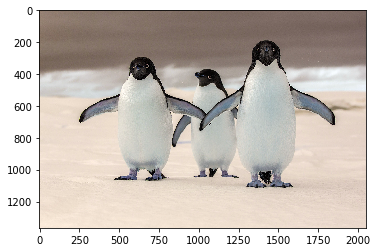

In [0]:
import cv2
import matplotlib.pyplot as plt

img_path = 'peng/01_adelie_penguin.jpg'
img = cv2.imread(img_path)
plt.imshow(img)

Before going any further, we have to import some prerequisites:

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image as keras_image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import numpy as np

In every deep learning task, we need to divide our dataset into train and test categories. The train category is used to train the model, and the test one is used to evaluate the trained model. The proportion of train and test dataset does not have any specific formula, and it is up to you, but you should consider the majority of the dataset as the train one.

In [0]:
import os
from random import shuffle 


imgs_f = os.listdir(FROG_PATH)
frogs_ds= []
try:
  for img_f in imgs_f:
    frogs_ds += [(img_f, '0')]
except:
  print(img_f," not valid.")

imgs_p = os.listdir(PENG_PATH)
pengs_ds = []
try:
  for img_p in imgs_p:
    pengs_ds += [(img_p, '1')]
except:
  print(img_p, ' not valid.')

full_ds = frogs_ds + pengs_ds
shuffle(full_ds)
dataset = [img[0] for img in full_ds]
labels = [lbl[1] for lbl in full_ds]

images = {'train': dataset[:60], 'test': dataset[60:]} # Put the images here
labels = {'train': labels[:60], 'test': labels[60:]} # Put the labels here

Now we change images to numeric feature vectors to feed them into the network.

To do so, we leverage the vgg16 model. It is a CNN model; these models will be discussed in the future.

In [0]:
vgg16_model = VGG16(weights='imagenet', include_top=False)
vgg16_model.summary()





58892288/58889256 [==============================] - 2s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
____________________________________________________

To prepare images to feed them into the network, some preprocessing is required. Implement this in this cell. For example, you can normalize images.

In [0]:
def preprocess_image(image):
  img = image.copy()
  img = keras_image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img//255.0

  return img

Now, you must first preprocess the images, then convert/encode them into feature vectors.

In [0]:
xs = {'train': [], 'test': []}
for image in images['train']:
  try:
    img = keras_image.load_img(FROG_PATH / image, target_size=(224, 224))
  except :
    img = keras_image.load_img(PENG_PATH / image, target_size=(224, 224))
  
  img = preprocess_image(img)
  features = vgg16_model.predict(img)
  ff = features.flatten()
  xs['train'].append(features)

for image in images['test']:
  try:
    img = keras_image.load_img(FROG_PATH / image, target_size=(224, 224))
  except :
    img = keras_image.load_img(PENG_PATH / image, target_size=(224, 224))
  
  img = preprocess_image(img)
  features = vgg16_model.predict(img)
  ff = features.flatten()
  xs['test'].append(features)

If you need to convert the labels into another format, you can do so by deleting the two last lines and implementing your code.

In [0]:
ys = {'train': [], 'test': []}
ys['train'] = labels['train'][:]
ys['test'] = labels['test'][:]

Now implement an MLP model for this task to separate frog images from penguin images.

If you want to import some modules or implement some helper functions or classes you can do it in this cell.

Now, implement your MLP from scratch.

In [0]:
class MLP(object):
  
  def train(self, x, y):
    """
    train MLP model on train data

    Args:
      x: 2d numpy array or list of train data
      y: 1d or 2d numpy array or list of train data labels
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return True
  
  def test(self, x, y):
    """
    test MLP model on test data

    Args:
      x: 2d numpy array or list of test data
      y: 1d or 2d numpy array or list of test data labels

    Returns:
      acc: In the simplest way ratio between the number of correct predicts with the number 
           of all train data
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return acc
  
  def predict(self, x):
    """
    predict output of MLP model on input data

    Args:
      x: 1d or 2d numpy array or list of input data

    Returns:
      pred: 1d numpy array or list or integer that represent output predicted 
            from MLP
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return pred
  
  def save_model(self, model_path):
    """
    save model to disk

    Args:
      model_path: path of model
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return True
  
  def load_model(self, model_path):
    """
    load model from disk

    Args:
      model_path: path of model
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    
    return True

In [0]:
def initialize_model():
  """
  initilize a MLP model that classify Iris dataset
  
  Returns:
    model: A MLP object
               
  Hint: Consider the number of features in the Iris dataset and the number of its classes 
        and initialize weights.
  """
  
  ########################################
  #     Put your implementation here     #
  ########################################
  
  return model

Evaluate your model(don't change this cell):

In [0]:
mlp = initialize_model()
mlp.train(xs['train'], ys['train'])
print('your model accuracy on test data is: %s' % (mlp.test(xs['train'], ys['test'])))
mlp.save_model(ASSIGNMENT_PATH / 'topvgg16_model.h5')

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg01__xx__xx.zip`) and submit it via [https://forms.gle/3srwTZhBbc4KfXaR8](https://forms.gle/3srwTZhBbc4KfXaR8).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [0]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_01'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg01__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 02 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

github.com username: Arianshh
github.com password for Arianshh (never stored): 
.login	Arianshh
.id	28684983
.node_id	MDQ6VXNlcjI4Njg0OTgz
.avatar_url	https://avatars1.githubusercontent.com/u/28684983?v=4
.gravatar_id	
.url	https://api.github.com/users/Arianshh
.html_url	https://github.com/Arianshh
.followers_url	https://api.github.com/users/Arianshh/followers
.following_url	https://api.github.com/users/Arianshh/following{/other_user}
.gists_url	https://api.github.com/users/Arianshh/gists{/gist_id}
.starred_url	https://api.github.com/users/Arianshh/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/Arianshh/subscriptions
.organizations_url	https://api.github.com/users/Arianshh/orgs
.repos_url	https://api.github.com/users/Arianshh/repos
.events_url	https://api.github.com/users/Arianshh/events{/privacy}
.received_events_url	https://api.github.com/users/Arianshh/received_events
.type	User
.site_admin	false
.name	
.company	
.blog	
.location	
.email	
.hireable	
.bio	
.pu

## Download Submission (Run the cell)

In [0]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg01_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.